<a href="https://colab.research.google.com/github/sofiebadsbergschnoor/Group_Assignment/blob/master/Group_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Group Assignment**

Link to Colab: https://colab.research.google.com/drive/1Xwu3ZVqFMwdJqjQeHr4OvbdOzgp3JxAX

Link to GitHub: https://github.com/sofiebadsbergschnoor/Group_Assignment/blob/master/README.md

We have chosen to work with PGA_Data: A historical dataset, which contains data from the PGA tour from 2010 to august 2018. We have chosen this dataset because we believe, we can find some interesting patterns between some features (independent variables) and how much money the Golf players earns. We will elaborate on the chosen variables later in the assignment, after taking a look at the data.  


**Problem statement:** *Does the golf player's skills have influence on how much money they earn?*


To answer the above problem statement, we have chosen six different abilities, which we believe have an influence on the income of the golf players. 

In this assignment, we will use Machine Learning techniques to analyse and find patterns in the dataset, but also predict how many money some random players earns. We will use the two branches of Machine Learning; Unsupervised and Supervised Learning, which will be further elaborated later in this assignment.


The dataset is collected from Kaggle, where Brad Klassen has collected data from the PGA tour's official webpage and thereby making it possible for us to investigate the features within the data from the tour. The dataset contains 5 columns. The 5th column can be unstacked so there will be a total of 2083 columns and 2740403 rows. The size of the dataset is 94 MB

*The structure of the assignment*


*   Cleaning of data
*   Exploratory Data Analysis


*   Unsupervised ML
*   Supervised ML


*   Conclusion




To begin this assignment, we import some releveant libraries that we will use later on in the assignment. The rest of the used libraries will be imported through the assignemnt. Next, we import the dataset, which we have chosen to work with throughout the assignment, and present information from the dataset. 



In [0]:
# Importing the different libraries.

import numpy as npt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
# Importing the data from google drive

from google_drive_downloader import GoogleDriveDownloader as gdd

gdd.download_file_from_google_drive(file_id='1EBufmoFd1Zq_SyOEgd4AJrMv-_3EkqPv',
                                    dest_path='./data/my_output.file',
                                    unzip=False)


In [0]:
# Read file

dataset=pd.read_csv('./data/my_output.file')

In [0]:

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2740403 entries, 0 to 2740402
Data columns (total 5 columns):
Player Name    object
Season         int64
Statistic      object
Variable       object
Value          object
dtypes: int64(1), object(4)
memory usage: 104.5+ MB


We want to be able to see our data within the following criteria with regards to maximum of rows, maximum of columns and width of 3000.



In [0]:
# Showing lots of columns and rows

pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 3000)
pd.set_option('display.width', 3000)


We unstack "variable", because it contains variables of the players abilities. To do so, we set the index to 'Player Name', 'Variable' and 'Season'

In [0]:
# Transpose based on key value pairs, and unstacking the "Variable" which contains 2078 different variables
df = dataset.set_index(['Player Name', 'Variable', 'Season'])['Value'].unstack('Variable').reset_index()
print("original column count:\t" + str(len(dataset.columns)))
print("     new column count:\t" + str(len(df.columns)))

original column count:	5
     new column count:	2083


We use df.head() to show your our dataset with the different variables and values.

In [0]:
df.head()

Variable     Player Name  Season % of Potential Pts won - FedExCup Playoffs - (# OF TOP 10'S) % of Potential Pts won - FedExCup Playoffs - (# OF WINS) % of Potential Pts won - FedExCup Playoffs - (%) % of Potential Pts won - FedExCup Playoffs - (EVENTS) % of Potential Pts won - FedExCup Playoffs - (PLAYOFF POINTS WON) % of Potential Pts won - FedExCup Playoffs - (POTENTIAL PTS) % of Potential Pts won - FedExCup Regular Season - (# OF TOP 10'S) % of Potential Pts won - FedExCup Regular Season - (# OF WINS) % of Potential Pts won - FedExCup Regular Season - (%) % of Potential Pts won - FedExCup Regular Season - (EVENTS) % of Potential Pts won - FedExCup Regular Season - (POINTS WON) % of Potential Pts won - FedExCup Regular Season - (POTENTIAL PTS) 1-Putts per Round - (AVG) 1-Putts per Round - (ROUNDS) 1-Putts per Round - (TOTAL 1 PUTTS) 1-Putts per Round - (TOTAL ROUNDS) 11-25 Final Round Performance - (# OF TIMES IMPROVED) 11-25 Final Round Performance - (% TIMES IMPROVED) 11-25 Final Round Performance - (EVENTS) 2-Putts per Round - (AVG) 2-Putts per Round - (ROUNDS) 2-Putts per Round - (TOTAL 2 PUTTS) 2-Putts per Round - (TOTAL ROUNDS) 2019 PGA Championship Points - (EVENTS) 2019 PGA Championship Points - (POINTS) 25+ Final Round Performance - (# OF TIMES IMPROVED) 25+ Final Round Performance - (% TIMES IMPROVED) 25+ Final Round Performance - (EVENTS) 3+ Putts per Round - (AVG) 3+ Putts per Round - (ROUNDS) 3+ Putts per Round - (TOTAL 3+ PUTTS) 3+ Putts per Round - (TOTAL ROUNDS) 3-Putt Avoidance - (%) 3-Putt Avoidance - (ROUNDS) 3-Putt Avoidance - (TOTAL 3 PUTTS) 3-Putt Avoidance - (TOTAL HOLES (OVERALL)) 3-Putt Avoidance - 10-15' - (%) 3-Putt Avoidance - 10-15' - (2 PUTT OR BETTER %) 3-Putt Avoidance - 10-15' - (ATTEMPTS) 3-Putt Avoidance - 10-15' - (ROUNDS) 3-Putt Avoidance - 10-15' - (TOTAL 3 PUTTS) 3-Putt Avoidance - 15-20' - (%) 3-Putt Avoidance - 15-20' - (2 PUTT OR BETTER %) 3-Putt Avoidance - 15-20' - (ATTEMPTS) 3-Putt Avoidance - 15-20' - (ROUNDS) 3-Putt Avoidance - 15-20' - (TOTAL 3 PUTTS) 3-Putt Avoidance - 20-25' - (%) 3-Putt Avoidance - 20-25' - (2 PUTT OR BETTER %) 3-Putt Avoidance - 20-25' - (ATTEMPTS) 3-Putt Avoidance - 20-25' - (ROUNDS) 3-Putt Avoidance - 20-25' - (TOTAL 3 PUTTS) 3-Putt Avoidance - 5-10' - (%) 3-Putt Avoidance - 5-10' - (2 PUTT OR BETTER %) 3-Putt Avoidance - 5-10' - (ATTEMPTS) 3-Putt Avoidance - 5-10' - (ROUNDS) 3-Putt Avoidance - 5-10' - (TOTAL 3 PUTTS) 3-Putt Avoidance - Inside 5' - (%) 3-Putt Avoidance - Inside 5' - (2 PUTT OR BETTER %) 3-Putt Avoidance - Inside 5' - (ATTEMPTS) 3-Putt Avoidance - Inside 5' - (ROUNDS) 3-Putt Avoidance - Inside 5' - (TOTAL 3 PUTTS) 3-Putt Avoidance > 25' - (%) 3-Putt Avoidance > 25' - (2 PUTT OR BETTER %) 3-Putt Avoidance > 25' - (ATTEMPTS) 3-Putt Avoidance > 25' - (ROUNDS) 3-Putt Avoidance > 25' - (TOTAL 3 PUTTS) 3-Putts per Round - (AVG) 3-Putts per Round - (ROUNDS) 3-Putts per Round - (TOTAL 3 PUTTS) 3-Putts per Round - (TOTAL ROUNDS)  \
0         A.J. McInerney    2018                                                NaN                                                          NaN                                                    NaN                                                NaN                                                   NaN                                                               NaN                                                          NaN                                                                NaN                                                            NaN                                                    NaN                                                         NaN                                                             NaN                                       NaN                          NaN                                 NaN                                NaN                                                NaN                                                   NaN                                      NaN       

We have chosen to use the following variables:

**Target variable** = Money

**Features** = Player Name, AvarageDistanceAfterDrive, DrivingAccuracy, Distance, BirdieConversion, Ball Speed, TotalEagles.


We have chosen these variables, as we would like to get a closer look at the link between the golf players' abilities and their income during the PGA tour. To do this, we define 'Money' as our target variable.

The Feature variables are Player Name, AvarageDistanceAfterDrive, DrivingAccuracy, Distance, BirdieConversion, Ball Speed, TotalEagles, which are some of the golf players' abilities. Therefore, we will have a furter look at these to see what kind of link there is between each abilite and money.

In [0]:
# Making an array containing the selected variables from the entire dataset

data_pga = ['Player Name','Season','Total Money (Official and Unofficial) - (MONEY)',
                'Average Distance to Hole After Tee Shot - (AVG)','Driving Accuracy Percentage - (%)','Total Distance Efficiency - (AVERAGE DISTANCE (YARDS))',
                'Ball Speed - (AVG.)', 'Total Eagles - (TOTAL)', 'Birdie or Better Conversion Percentage - (%)']
data_pga

['Player Name',
 'Season',
 'Total Money (Official and Unofficial) - (MONEY)',
 'Average Distance to Hole After Tee Shot - (AVG)',
 'Driving Accuracy Percentage - (%)',
 'Total Distance Efficiency - (AVERAGE DISTANCE (YARDS))',
 'Ball Speed - (AVG.)',
 'Total Eagles - (TOTAL)',
 'Birdie or Better Conversion Percentage - (%)']

# **Cleaning the data**

In the cleaning process, we start by dropping non-numeric values. After this, we rename some of the colums to give them a shorter and more understandable name. The reason for doing this is to make the work and understanding easier further on. 

In [0]:
# Dropping NaN values

df=df[data_pga].dropna()

In [0]:
# Remaning features

df.rename(columns = {'Total Money (Official and Unofficial) - (MONEY)':'Money'}, inplace = True)
df.rename(columns = {'Average Distance to Hole After Tee Shot - (AVG)':'AverageDistanceAfterDrive'}, inplace = True)
df.rename(columns = {'Driving Accuracy Percentage - (%)':'DrivingAccuracy'}, inplace=True)
df.rename(columns = {'Total Distance Efficiency - (AVERAGE DISTANCE (YARDS))':'Distance'}, inplace=True)
df.rename(columns = {'Ball Speed - (AVG.)':'BallSpeed'}, inplace=True)
df.rename(columns = {'Birdie or Better Conversion Percentage - (%)':'BirdieConversion'}, inplace=True)

In [0]:
# Remaning features

df.rename(columns = {'Total Eagles - (TOTAL)':'TotalEagles'}, inplace=True)

By using .head() you can see the new columns names.

In [0]:
df.head()

Variable,Player Name,Season,Money,AverageDistanceAfterDrive,DrivingAccuracy,Distance,BallSpeed,TotalEagles,BirdieConversion
1,Aaron Baddeley,2010,"879,317",166.1,56.65,300.441,177.01,13,31.65
2,Aaron Baddeley,2011,"$3,157,193",168.4,55.67,298.890,176.34,6,32.99
3,Aaron Baddeley,2012,"$1,215,753",169.4,54.30,306.011,176.75,3,32.67
4,Aaron Baddeley,2013,"$721,024",179.8,50.71,296.356,176.32,9,32.99
5,Aaron Baddeley,2014,"$942,559",176.5,52.29,293.636,174.49,2,32.00


To avoid problems when using the Money value, we remove all the $-signs and commas. 

In [0]:
# Removing $-sign and commas from our 'Money' variable.

df['Money']= df['Money'].str.replace('$','')
df['Money']= df['Money'].str.replace(',','')

Here you can see the information of the table, where the features are objects, which we want to convert to float. We have chosen to convert the obejct into float, as the analysis only accept numerical values. 

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1667 entries, 1 to 11218
Data columns (total 9 columns):
Player Name                  1667 non-null object
Season                       1667 non-null int64
Money                        1667 non-null object
AverageDistanceAfterDrive    1667 non-null object
DrivingAccuracy              1667 non-null object
Distance                     1667 non-null object
BallSpeed                    1667 non-null object
TotalEagles                  1667 non-null object
BirdieConversion             1667 non-null object
dtypes: int64(1), object(8)
memory usage: 130.2+ KB


In [0]:
# Making our values into float

for col in df.columns[2:]:
  df[col] = df[col].astype(float)
  df

Now all the objects are float, which can be seen below:

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1667 entries, 1 to 11218
Data columns (total 9 columns):
Player Name                  1667 non-null object
Season                       1667 non-null int64
Money                        1667 non-null float64
AverageDistanceAfterDrive    1667 non-null float64
DrivingAccuracy              1667 non-null float64
Distance                     1667 non-null float64
BallSpeed                    1667 non-null float64
TotalEagles                  1667 non-null float64
BirdieConversion             1667 non-null float64
dtypes: float64(7), int64(1), object(1)
memory usage: 130.2+ KB


**Scaling the data to be able compare the variables**

We use StandardScaler() to scale our data, which is necessary for the machine learning techniques to compare the data in the different columns. The idea behind StandardScaler is that it will transform the distribution of our data so it gets a mean value of 0 and  a standard deviation of 1. 
StandardScaler, for example, makes it possible for us to compare AverageDistance (yards) to TotalEagles (number). 

In [0]:
# Importing necessary library

from sklearn.preprocessing import StandardScaler

In [0]:
# Scaling our features

scaler = StandardScaler()
feature_columns=['AverageDistanceAfterDrive', 'DrivingAccuracy', 'Distance', 'BallSpeed', 'BirdieConversion', "TotalEagles"]
df[feature_columns]=scaler.fit_transform(df[feature_columns])
df.describe()

Variable,Season,Money,AverageDistanceAfterDrive,DrivingAccuracy,Distance,BallSpeed,TotalEagles,BirdieConversion
count,1667.000000,1.667000e+03,1.667000e+03,1.667000e+03,1.667000e+03,1.667000e+03,1.667000e+03,1.667000e+03
mean,2014.005999,1.554733e+06,7.202797e-16,-2.013986e-16,1.865260e-16,-4.919081e-16,-3.250083e-17,2.374892e-15
std,2.608963,1.482411e+06,1.000300e+00,1.000300e+00,1.000300e+00,1.000300e+00,1.000300e+00,1.000300e+00
min,2010.000000,2.465000e+04,-3.795212e+00,-3.641865e+00,-2.530185e+00,-2.673537e+00,-1.655346e+00,-3.159197e+00
25%,2012.000000,5.792975e+05,-5.726978e-01,-6.937542e-01,-7.007125e-01,-6.896984e-01,-7.204635e-01,-6.527240e-01
50%,2014.000000,1.083787e+06,1.950654e-02,7.335173e-04,-3.683530e-02,-6.370196e-02,-9.720836e-02,3.628153e-03
75%,2016.000000,1.955328e+06,6.655477e-01,6.882962e-01,6.183405e-01,6.755858e-01,5.260468e-01,6.291450e-01
max,2018.000000,1.303046e+07,2.711345e+00,3.057667e+00,3.597061e+00,3.090262e+00,4.265578e+00,3.540882e+00


In the table above we can see that the features has been scaled by looking at the mean and standard deviation. Take for example AverageDistance where the mean is now 0.000000000000000172 and the standard deviation is 1.0003 

In [0]:
df.head()

Variable,Player Name,Season,Money,AverageDistanceAfterDrive,DrivingAccuracy,Distance,BallSpeed,TotalEagles,BirdieConversion
1,Aaron Baddeley,2010,879317.0,-1.287958,-0.945036,0.868219,1.472760,2.084185,1.144536
2,Aaron Baddeley,2011,3157193.0,-0.934173,-1.138939,0.712196,1.361949,-0.097208,1.734812
3,Aaron Baddeley,2012,1215753.0,-0.780354,-1.410007,1.428533,1.429759,-1.032091,1.593851
4,Aaron Baddeley,2013,721024.0,0.819367,-2.120323,0.457288,1.358641,0.837674,1.734812
5,Aaron Baddeley,2014,942559.0,0.311763,-1.807705,0.183669,1.055980,-1.343719,1.298712


# **Exploratory data analysis**

In The EDA we start by looking at the top 10 players in our feature variables, and showing the income for some players, as well as the mean income for all the players. Afterwards we make a pairplot to get a nice overview of our variables, and then we do linear regressions, to inspect the link between the Target variable and the Features.



**Presenting top 10 in each feature**

We create a groupby() to get an overviwe of the first 10 players, who rank the highest within the Money variable and the chosen features.

In [0]:
# Groupby 'Money'

df.groupby('Player Name').Money.mean().sort_values(ascending=False).index[:10]

Index(['Tiger Woods', 'Jordan Spieth', 'Justin Thomas', 'Dustin Johnson', 'Jon Rahm', 'Bryson DeChambeau', 'Rory McIlroy', 'Jason Day', 'Hideki Matsuyama', 'Justin Rose'], dtype='object', name='Player Name')

Here we create different list according to the previous chosen abilities of the golf players, which we will use as a selection tool for our upcoming prediction.

In [0]:
# Groupby 'Player Name' and 'AverageDistanceAfterDrive'

df.groupby('Player Name').AverageDistanceAfterDrive.mean().sort_values(ascending=False).index[:10]

Index(['Brad Faxon', 'Soren Kjeldsen', 'Mike Weir', 'Jon Curran', 'Jin Park', 'Nick O'Hern', 'Omar Uresti', 'Luke Donald', 'David Lynn', 'Colt Knost'], dtype='object', name='Player Name')

In [0]:
# Groupby 'Player Name' and 'DrivingAccuracy'

df.groupby('Player Name').DrivingAccuracy.mean().sort_values(ascending=False).index[:10]

Index(['Omar Uresti', 'Joe Durant', 'Ryan Armour', 'Tim Clark', 'Thomas Aiken', 'Heath Slocum', 'David Toms', 'Justin Hicks', 'Jerry Kelly', 'Jim Furyk'], dtype='object', name='Player Name')

In [0]:
# Groupby 'Player Name' and 'BallSpeed'

df.groupby('Player Name').BallSpeed.mean().sort_values(ascending=False).index[:10]

Index(['Brandon Hagy', 'Ryan Brehm', 'Andrew Loupe', 'Bubba Watson', 'Tony Finau', 'Keith Mitchell', 'Peter Uihlein', 'Trey Mullinax', 'Charlie Beljan', 'Luke List'], dtype='object', name='Player Name')

In [0]:
# Groupby 'Player Name' and 'TotalEagles'

df.groupby('Player Name').TotalEagles.mean().sort_values(ascending=False).index[:10]

Index(['Justin Thomas', 'Brandon Harkins', 'Tony Finau', 'Dustin Johnson', 'Hiroshi Iwata', 'Brandon Hagy', 'Bubba Watson', 'Brooks Koepka', 'Conrad Shindler', 'Tyler Duncan'], dtype='object', name='Player Name')

In [0]:
# # Groupby 'Player Name' and 'BirdieConversion'

df.groupby('Player Name').BirdieConversion.mean().sort_values(ascending=False).index[:10]

Index(['Jordan Spieth', 'Justin Thomas', 'Tommy Fleetwood', 'Dustin Johnson', 'Jon Rahm', 'Brooks Koepka', 'Rory McIlroy', 'Phil Mickelson', 'Brandon Harkins', 'Grayson Murray'], dtype='object', name='Player Name')

By looking at the above lists, we can see that the 10 players who earns the most isnt represented in AverageDistanceAfterDrive, DricingAccuracy and ballspeed. Therefore for now it seems like these features doesnt have a inpact on how much money they earns. In contrast we can see that Jordan Spieth, Justin Thomas, Dustin Johnson, John Rahm, Rory McIlroy, are represented in birdieconversion and the Money variable, therefore it seems like this abilitie has a big impact on the money they earn.

---








**Showing the income of three different golfplayers**

Before contiuning, we will show the income of the 3 golfplayers to get an overview of how much they in average earn on the PGA Tour.

In [0]:
# Mean income for Tiger Woods

Tiger_Woods=df[df['Player Name'].str.contains('Woods')]
Tiger_Woods.Money.mean()

6973201.666666667

In [0]:
# Mean income for Justin Thomas

Justin_Thomas=df[df['Player Name'].str.contains('Thomas')]
Justin_Thomas.Money.mean()

5115132.8

In [0]:
# Mean income for Soren Kjeldsen

Soren_Kjeldsen=df[df['Player Name'].str.contains('Kjeldsen')]
Soren_Kjeldsen.Money.mean()

2002913.0

Furthermore, we calculate the mean() of all the golfplayers income to get an idea of how much a golfplayer earn on average.

In [0]:
# Finding the mean of Money

df.Money.mean()

1554732.5956808638

The above findings gives us an idea of our selected features and how much money some of the golfplayers earn.

For example, we are able to see that Tiger Woods, who is the person that earns the most, is not in top ten of any of our selected features. Therefore it seems like its not only our selected Features that have an impact on how much money they earn. In the example of Tiger Woods one can imagine, that a big part of his income is not from the PGA Tour in it self.


**Creating a pairplot**

Beneath we have made an pairplot of all of our variables, to get a nice overview of the link between them.

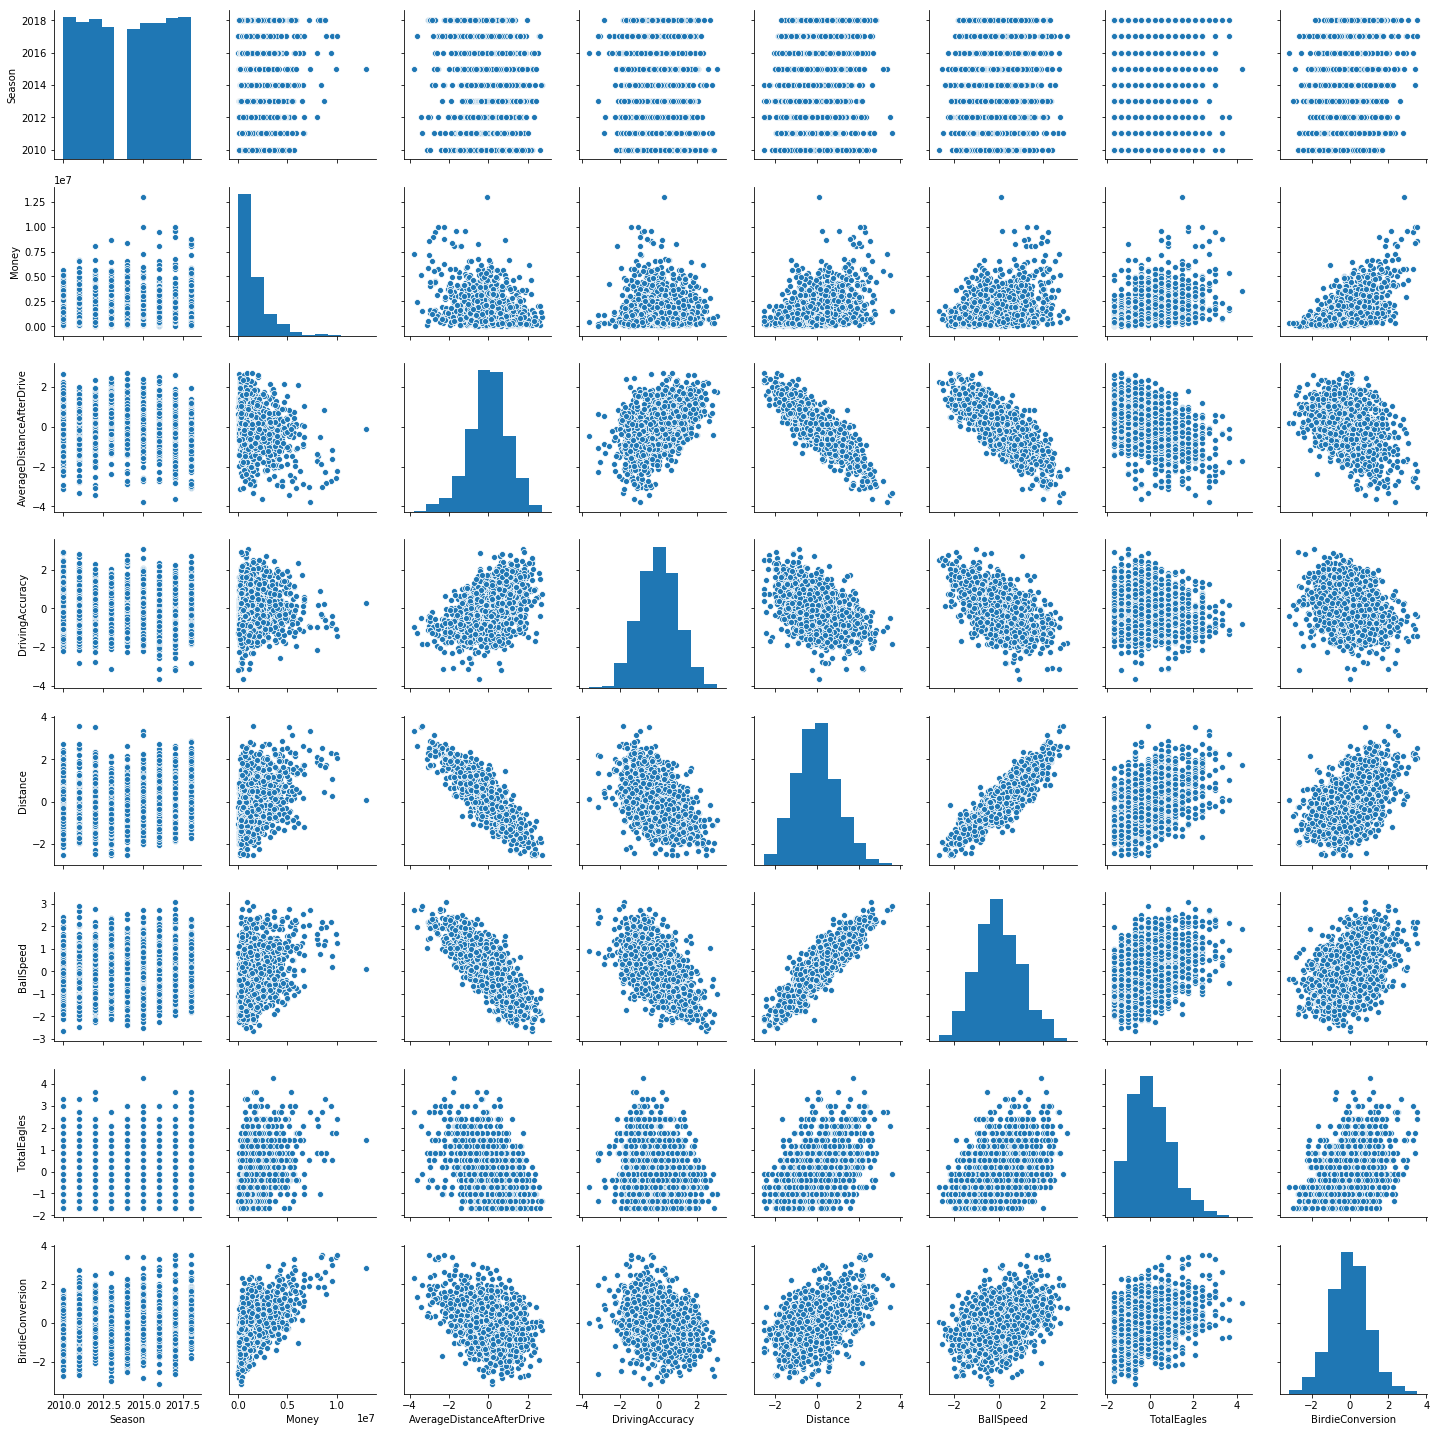

In [0]:
sns.pairplot(df)

In the pairplot we can see that within ‘season’ all of the dots are in line, due to the fact that the observations, of course, is placed in each of the seasons. Furthermore, at the position where each feature crosses with itself, the observations are illustrated as a histogram.

We have chosen to include this overview of our project as it illustrates the different links between our chosen features. For example if we look at the link between ‘BallSpeed’ and ‘Distance’ we can see that there is a positive link between the two features, indicating that the higher the speed of the ball, the longer the distance. As an opposite example, we can see that there is no link between ‘TotalEagles’ and ‘AverageDistanceAfterDrive’, which also logically makes sense as ‘TotalEagles’ is an indication of number of tries and ‘AverageDistanceAfterDrive’ is an indicator of length in one try.

By using this overview, we can already before starting our analysis get an idea of which features affect each other, and which are not linked at all. 

**Linear Regression**

In the following, we will use linear regression between our target variable Money and the different Features. A Linear regression is used for finding linear relationships between output and one or more inputs. With the linear regression we can get a more detailed understanding of the relationship between our variables.


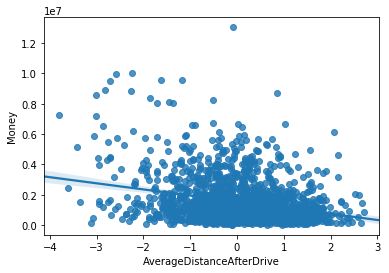

In [0]:
sns.regplot(x='AverageDistanceAfterDrive', y='Money', data=df)

In this plot it is possible to see that there is a negative link between Money and AverageDistanceAfterDrive. Therefore the longer distance the player has to the hole after the drive, the less money they earn. This makes sense because the player then need more shots to get the ball in hole.

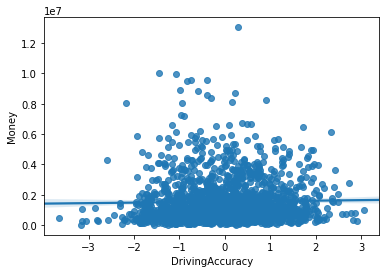

In [0]:
sns.regplot(x='DrivingAccuracy', y='Money', data=df)

In this plot it is possible to see that there is a slightly positive link between Money and DrivingAccuracy. Therefore the more accurate you drive shot is the more money you earn, but again it doesnt have that big of an impact.

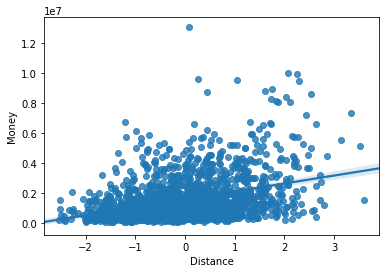

In [0]:
sns.regplot(x='Distance', y='Money', data=df)

In this plot it is possible to see that there is a positve link between Money and Distance. Therefore the the longer the distance of your shot is the more money the player earns

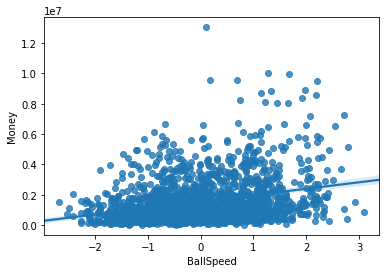

In [0]:
sns.regplot(x='BallSpeed', y='Money', data=df)

In this plot it is possible to see that there is a positive link between Money and BallSpeed. Therefore the higher the speed of the ball reaches, the more money the player earns.

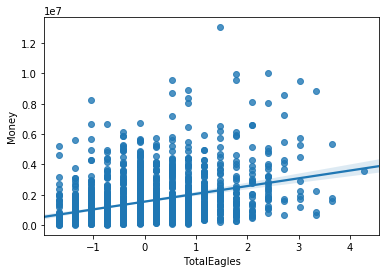

In [0]:
sns.regplot(x='TotalEagles', y='Money', data=df)

In this plot it is possible to see that there is a positive link between Money and Total Eagles. Therefore the higher number of eagles the player makes the more they earns.

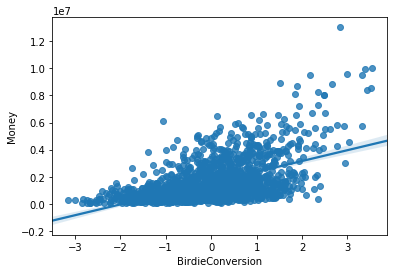

In [0]:
sns.regplot(x='BirdieConversion', y='Money', data=df)

In this plot it is possible to see that there is a positive link between Money and BirdieConversion. THerefore the more Birdieconversion the player does the more they earns.

We expected that the golfplayers abilities have influence on how much money they earn. For example the Linear Regression of DrivingAccuracry shows that it does almost not have any influence on how much money they earn, which we find quite interesting, since we had expected it would influence it more because the drive is the first shot in golf, which is the reason why we exptected that the accuracy of this shot have a great influence on the rest of the hole. 

The pairplot with 'Season' shows that it has no influence on how much money the players earn and given that we are more interested in how their abilities influence their income, we have chosen to drop 'Season'.

In [0]:
# Dropping season

df.drop('Season', axis='columns', inplace=True)

# **Unsupervised Macine Learning**

Unsupervised learning learns from test data that has not been labeled, classified or categorized. Unsupervised learning identifies similarities in the data and reacts based on the presence or absence of such similarities in each new piece of data.

**Dimensionality by using PCA**

Principal Component Analysis (PCA) is a well known method within unsupervised machine learning. It is a tool to summarise information without losing important information. We have used a PCA to simplify the dataset by turning the original variables into four new variables. The four new variables is created from the six old independent features in this case the golf players abilities. We create these new independent variables in a specific way (the PCA algorithm) and order these new variables by how well they predict our dependent variable. 


In [0]:
# Importing the necessary library

from sklearn.decomposition import PCA

In [0]:
# Using PCA

pca = PCA(n_components=4)

In [0]:
# Using fit_transform on our PCA

feature_reduced = pca.fit_transform(df[feature_columns])

In [0]:
feature_reduced.shape

(1667, 4)

By using this method, we now only have four features which are made from the components with the highest correlation with our dependent variable; money, from the six old variables.
This new dataset is stored in; *feature_reduced*, which still has 1667 rows.

In [0]:
# Finding the explained_variance_ratio by using .sum()

pca.explained_variance_ratio_.sum()

0.954377411172437

In our case, the explained variance is 0.954 or 95.4 procent. In other words, the four new variables, explains 95.4 procent of the variance in the old six variables and their "sammenhæng" with money.

**Cluster analysis**

In [0]:
# Importing necessary library

from sklearn.cluster import KMeans

Clustering is a method of unsupervised learning and is a common technique for statistical data analysis used in many fields. We can use cluster analysis to gain some valuable insights from our data by seeing what groups the data points fall into when we apply a clustering algorithm - like KMeans. KMeans is one of the most popular clustering algorithms. KMeans stores k centroids that it uses to define clusters. A point is considered to be in a particular cluster if it is closer to that cluster’s centroid than any other centroid. 

We use the elbow method to decied, how many clusters we should use in our cluster analysis. Since, we want a good clustering with low inertia, but without too many clusters. we choose the number of clusters where the inertia decreases the most. 

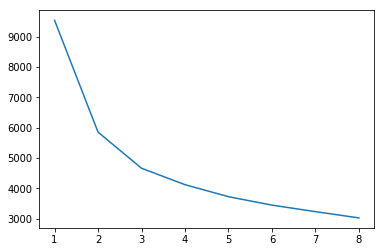

In [0]:
# Performing KMeans to find appropriate numbers of clusters.

inertia = []
for i in range(1,9):
  k_means = KMeans(n_clusters=i)
  inertia.append(k_means.fit(feature_reduced).inertia_)

sns.lineplot(y = inertia, x = range(1,9))

It can be difficult to figure out where this exactly happens, but in this case, we have chosen two clusters, as it seems like the spot where the curve starts to bend radically. 
Now that we have the number of clusteres, we can use KMeans()

In [0]:
# Clustering of the data

cluster = KMeans(n_clusters=2)
cluster.fit(feature_reduced)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

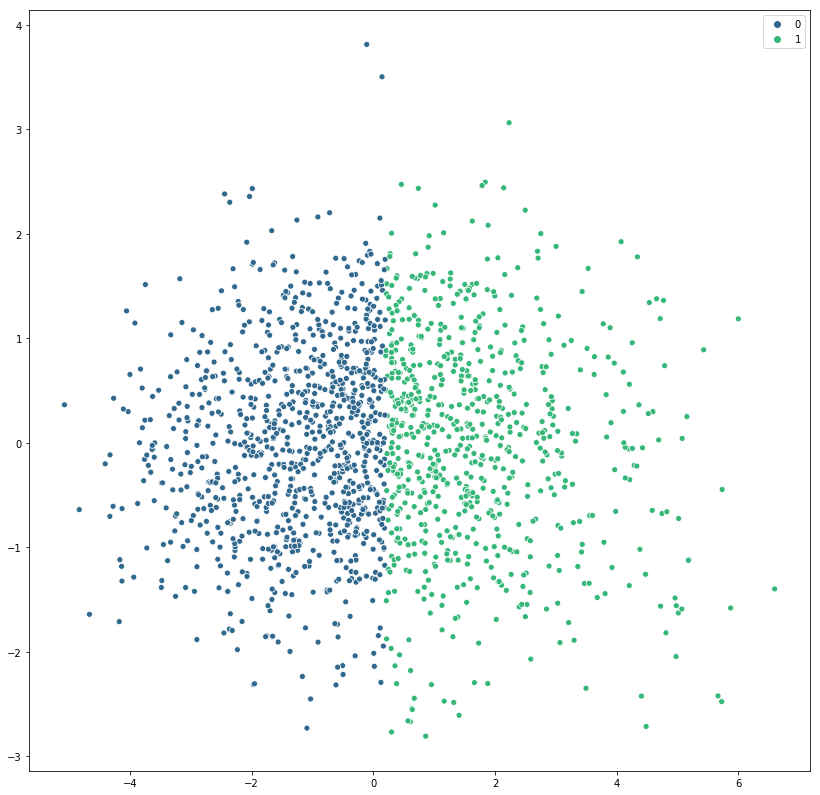

In [0]:
# Plotting our clusters with two different colors.

plt.figure(figsize=(14,14))
g = sns.scatterplot(feature_reduced[:,0], feature_reduced[:,1], hue=cluster.labels_,
               legend='full', palette='viridis')

legend = g.get_legend()


The above figure shows that we have clustered our data into two different clusters as illustrated with the two different colors. The values that are in the blue cluster (Cluster 0) are more poor than the values in the green cluster (Cluster 1). Otherwise the figure does not provide us with any more details, which is the reason, why we will find the mean for the features in each cluster. 

In [0]:
# Labelling our data

df['cluster'] = cluster.labels_

In [0]:
# Finding the mean of the features within the clusters by using groupby()

print(cluster)
df.groupby('cluster').mean()

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)


Variable,Money,AverageDistanceAfterDrive,DrivingAccuracy,Distance,BallSpeed,TotalEagles,BirdieConversion
cluster,,,,,,,
0,1.197588e+06,0.600415,0.458048,-0.644815,-0.640882,-0.376450,-0.400585
1,2.019908e+06,-0.782032,-0.596601,0.839862,0.834741,0.490322,0.521757


By looking at the above table, we can see that Cluster 0 (the blue values) in average have a lower income than the players in Cluster 1.

With regards to the features, we can see that both AverageDistance and DrivingAccuracy are the only features that on average have higher values in Cluster 1 than Cluster 0. This relates to our EDA analysis, since the graph showed that these two features were the only ones that had either a negative link or no almost no link with money.

The remaining features have higher values in Cluster 1 as well as, in the EDA analysis, a positive link with money.

# **Supervised Machine Learning**

Supervised learning is where you have several input variables and an output variable and you use an algorithm to learn the mapping function from the input to the output. 
The goal is to approximate the mapping function so well that when you have a new input data that you can predict the output variables for that data.

**Train_test_split**

Before being able to use the train_test_spilt code, we need to do a little bit of preprossing by creating our X and y.

In [0]:
# Creating a x

X = df.drop(['Money','Player Name'], axis=1)

In [0]:
# Creating a y

y = df['Money']

Now that we have done our preprossing, we can use train_test_split.


We are using the .train_test_plit from sklearn to split the data in a trainingset with 75% of the data and a testset with 25% of the data. Here the model will learn from the trainingset of the 75%. A danger from this split, is that the data can be overfitted. For examples, It can be overfitted if the split is not random, and the trainingset contains more persons that earns the most money than the test set.

In [0]:
# Importing necessary library 

from sklearn.model_selection import train_test_split

In [0]:
# Splitting the data by using train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 42)

**K-fold cross validation score**

As a part of this, we will now make a cross validition test. In this test, we split the 75% trainingdata into five
subsets, herefrom using four to train and one to evaluate. This will with certainty reduce the risk of the data being overfitted or underfitted.

In [0]:
# Importing necessary library

from sklearn.model_selection import cross_val_score

In [0]:
# Importing necessary library

from sklearn import linear_model

In [0]:
# Importing necessary library

from sklearn.linear_model import LinearRegression

In [0]:
# Instantiaing the model

model = LinearRegression()

In [0]:
# Splitting the 75 procent into five chunks (4 to train and 1 to evaluate)

scores = cross_val_score(model, X_train, y_train, scoring='explained_variance', cv=5)
print(scores)

[0.34726184 0.360519   0.3732822  0.39976536 0.40233296]


The K-fold cross valdiation score gives us five different numbers, where the number in the middle is the mean. The lowest score is the first number, which is 0.34 and the highest score is the last number, which is 0.40. 

By looking at the five different numbers, we can see that they are quite close to each other, which is good, as the numbers should be as close as possible.



**Use of algorithms**


As mentioned in the beginning of the assignment, we want to predict how much and if the golf players' abilities influence how much money they earn. To do this, we use three different algorithms. Details about the codes and the reason for choosing these algorithms will be explained below each type of algorithm. 


**Linear regression on all features**

We will now make Linear Regresssion. As mentioned earlier, a Linear Regression is used for finding linear relationships between output and one or more inputs. With the Linear Regression, we can get a more detailed understanding of the relationship between our variables. To do this, we will be using .fit(), .predict() and .score().

In [0]:
# Instantiating the model

reg_all = linear_model.LinearRegression()

In [0]:
# Training the model

reg_all.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
# Predicting 

y_pred = reg_all.predict(X_test)

To evaluate on the test results, we use .score()

In [0]:
# Using .score() to evaluate on the results

reg_all.score(X_test, y_test)

0.42801605288541966

By using Linear Regression, we get the number 0.42 which tells us about the precision of the regression. Since the number is 0.42, it is a bit low and the algorithm may not be the best.

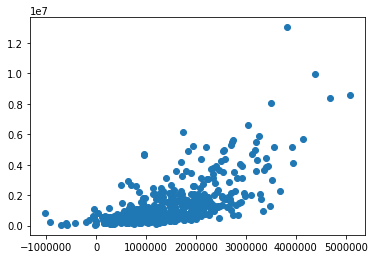

In [0]:
# Creating a plot of the results

train = plt.scatter(y_pred,y_test)

To give a visuliazation of our results, we are using plt.scatter.

One of the major aspects of training a machine learning model is avoiding overfitting. Overfitting will make the model less accurate. Overfitting happens when a model is trying too hard to capture the data points that don’t really represent the true properties of the data, but random chance. Regularization helps in avoiding overfitting. We will use the two regularization models lasso and ridge regression. 


Lasso and Ridge Regression is a way to ensure you don't overfit your training data - essentially, you are making your model less sensitive to the training data.
The key difference between these two is the penalty term. Ridge adds squared magnitude and lasso adds absolute value of magnitude.


**Ridge**

When using the Ridge algorithm, the algorithm seeks to use the observations in the middle, meaning that it ignores the outliers at the buttom and at the top. Therefore, the scatterplot for this algotirhm is more compressed than the above illustration of the linear regression. 

In [0]:
# Importing necessary libray

from sklearn.linear_model import Ridge

In [0]:
# Training the model

ridge = Ridge(alpha=0.5, normalize=True).fit(X_train, y_train)

In [0]:
# Predicting 

ridge_pred = ridge.predict(X_test)

In [0]:
# Using -score() to evaluate on the results

ridge.score(X_test, y_test)

0.36248624720094197

By using Ridge, we get the number 0.36 which tells us about the precision of the algorithm. Since the number is 0.36 it is a bit low and the algorithm may not be the best either.

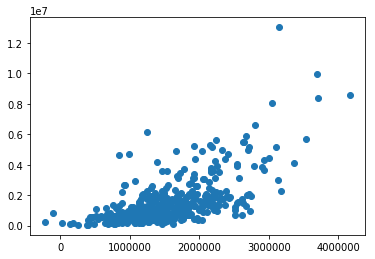

In [0]:
# Creating a plot of the results

plt.scatter(ridge_pred, y_test)

To give a visuliazation of our results, we are using plt.scatter.

**Lasso**

Lasso is used to choose the variables that tells the most about our y-variable. Therefore, this alogrithm is good for selection of variables when working with big dataset.

In [0]:
# Importing necessary library

from sklearn.linear_model import Lasso

In [0]:
# Istantiaing the model

lasso = Lasso(alpha=0.1, normalize=True)

In [0]:
# Training the model

lasso.fit(X_train, y_train)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=True,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

In [0]:
# Predicting

lasso_pred = lasso.predict(X_test)

In [0]:
# Using .score() to evaluate on the results

lasso.score(X_test, y_test)

0.4280161287243345

By using Lasso, we get the number 0.42, which tells us about the precision of the algorithm. Since the number is 0.42 it is still a bit low and the algorithm may not be the best either.

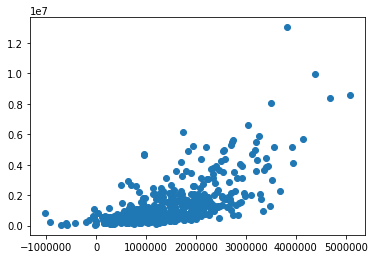

In [0]:
# Creating a plot of the results

plt.scatter(lasso_pred, y_test)

To give a visuliazation of our results, we are using plt.scatter.

**Evaluating the results**

To evaluate the three alogrithms, we have used .score() for each algorithm. By comparing the results from each of the three algroithms, we can see that neither of the algorihms are precise in their results and the low scores show that they are not the best for this assignment.

However, Linear Regression and Lasso get the result 0.42, which is a bit better than the result from Ridge, as it had the score of 0.36.

**Comparison of how much money the golf players actually earn and the predicted amount of money**

The code below is comparison of the predicted amount of money and the actual amount of money earnt. The predicted variable (y_pred) is from the Linear Regression algorithm used earlier in the assignment. The predicted variable is chosen because it was the most precise of the diffenrent algorithm model used. 
The table below shows 25 random golf players and how much they earnt during the PGA tour and how much we predicted they would earn based on their golf abilities.

In [0]:
# Creating a new DataFrame to using for the prediction

df2 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df2.head(25)
df1

,Actual,Predicted
5841,351216.0,1.278330e+05
6090,45460.0,-5.839386e+05
2248,1305554.0,1.805898e+06
4560,9938330.0,4.393705e+06
10878,2101260.0,2.040201e+06
1064,768383.0,2.175550e+06
5888,818682.0,1.452092e+06
590,1944289.0,2.972653e+06
1854,2082044.0,1.655101e+06
1665,332618.0,-3.340759e+03


The graph below shows the actual and predicted amount of money calculated above. The graph gives an overview of the same 25 random golf players which makes it easy to see that the predictions really is not that precise. 

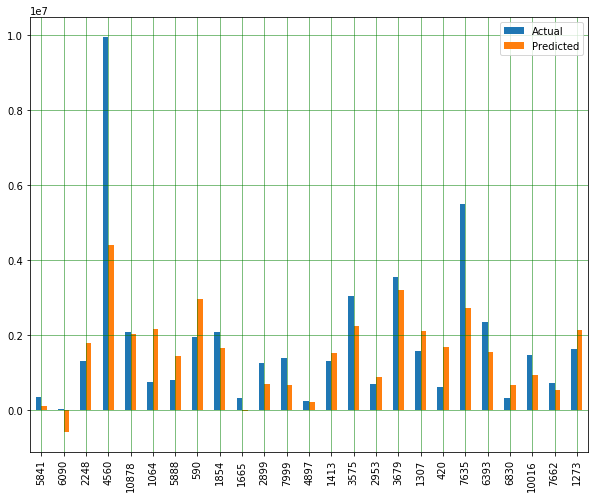

In [0]:
# Plotting the above results

df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# **Conclusion**

Starting this paper, we were looking at the different links between certain skill sets of golf players to see whether or not the chosen skills had any influence on the income for the different players. Furthermore, we wanted to see if other factors than the skill sets had any influence on their income. 

In the EDA analysis in the beginning of this paper, we saw that there definitely were links between some of our chosen skills, but also that some of these skills, which we thought had big influence, did not by first glance seem to have much of an impact. Furthermore, we saw that Tiger Woods, who is a very famous golf player, had the largest mean income at the PGA tour, in spite of him not being in the top 10 in any of our chosen categories. To illustrate these findings, we used different illustrations and graphs, to make it easy to read as well as understandable. 

In the second part of the assignment, we began to analyse our data using PCA and cluster analysis. For the cluster analysis, we created two different clusters that showed our data divided into two groups. These two groups contained the good golf players and the less good golf players, based on their income, respectively. We were thereby able to conclude that cluster 0 (the blue values) had a smaller income in average than cluster 1 (the green values). 

In the last part, we used techniques within supervised ML and used the train_test_split function to train our dataset into later on making prediction regarding the incomes. This analysis showed us that the actual incomes and the predicted incomes were far apart, and thereby indicating that the methods used for this analysis were not able to create a precise result. This can be due to that fact that a large part of the dataset consisted of NAN values, thereby making it difficult to create precise predictions. We believe this can be due to the fact that some of the golf players were not good enough and thereby not interesting enough for someone to document all data on the players. 

The outcome from this paper that is relevant for further use, is that the skills chosen for this analysis do in fact influence the income of golf players as well as other factors eg. fame. 

The final conclusion of this paper is that we have chosen to change our career path and start playing golf instead.


